# Miniproyecto 1: Clasificación de MRI con Redes Neuronales Convolucionales para Tipos de Cáncer

Realizado por: Michael Bustos, Jairo Serrano

La resonancia magnética (MRI) desempeña un papel fundamental en la detección y 
clasificación  de  los  diferentes  tipos  de  cáncer  cerebral.  La aplicación  de  redes neuronales convolucionales (CNN) ha incrementado notablemente la precisión en la interpretación  de  estos  volúmenes,  al  ser  entrenadas para  reconocer  patrones  y características  distintivas  asociadas  a  cada  tipo de  tumor.  Las  resonancias magnéticas  (MRI)  generan  volúmenes  tridimensionales  compuestos  por  múltiples capas, donde cada una corresponde a una imagen bidimensional del tejido analizado. Procesar  un  volumen completo  implica  manejar  una  gran  cantidad  de  datos simultáneamente,  lo  que puede  ser  computacionalmente  costoso  y  requerir considerable tiempo y recursos. Para este proyecto se trabajará exclusivamente con imágenes individuales extraídas de las capas de los MRI, en lugar de procesar el volumen completo. Esta estrategia simplifica la tarea al transformar el problema en una  clasificación  de  imágenes  bidimensionales,  reduciendo  significativamente la carga computacional.

## Redes Neuronales Convolucionales 
Las CNN son especialmente adecuadas para el análisis de imágenes debido a su 
capacidad para captar características locales a través de convoluciones. Estas redes 
pueden ser entrenadas para clasificar las imágenes extraídas de los MRI en cuatro 
categorías: glioma, meningioma, pituitary (hipófisis) y tejido sano. Por ejemplo: 
- Glioma: Detecta masas anómalas con bordes irregulares y heterogeneidad en el tejido cerebral. 
- Meningioma: Identifica tumores bien delimitados originados en las meninges. 
- Pituitary: Clasifica adenomas hipofisarios en la región selar. 
- Tejido sano: Diferencia el tejido cerebral normal sin anomalías presentes. 

## Procesamiento de Imágenes 
El procesamiento de imágenes mediante redes neuronales convolucionales (CNN) 
involucra múltiples capas de convolución, activación y pooling, que permiten extraer y analizar  características  relevantes  de  las  imágenes.  Estas  técnicas  facilitan  una distinción precisa entre distintos tipos de tumores y el tejido sano, mejorando la exactitud del diagnóstico médico.

## Ventajas y Aplicaciones 
Implementar CNN para la clasificación de las imágenes extraídas de los MRI ofrece varias ventajas: 
- Eficiencia en el diagnóstico: Acelera el proceso de evaluación de imágenes, permitiendo  a  los  profesionales  médicos  enfocarse  en  otros  aspectos  del tratamiento. 
- Consistencia en la clasificación: Proporciona una clasificación uniforme y precisa, reduciendo la variabilidad entre evaluadores. 
- Asistencia  para  profesionales  menos  experimentados:  Ofrece  una herramienta valiosa para radiólogos en formación o con menos experiencia. 
- Mejora en la calidad del diagnóstico: Optimiza la detección temprana y el tratamiento adecuado de diferentes tipos de cáncer cerebral. 

## A.  Objetivo 
- Desarrollar un método basado en redes neuronales convolucionales que permita clasificar con exactitud imágenes extraídas de MRIs en una de las 4 categorías. 
 
## B.  Conjunto de datos 
- Los datos corresponden a un dataset de 7023 imágenes extraídas de MRIs tomados desde distintos ángulos y disponibles para dominio público. El dataset es accesible en el siguiente enlace. 
 
## C.  Actividades por realizar 
1. Preparación  de  las  imágenes  para  el  entrenamiento  y  prueba  del  modelo. Construya un pipeline para cargar las imágenes y dividirlas en conjuntos de entrenamiento y prueba. 
2. Desarrollo de la arquitectura de red neuronal convolucional para clasificación de las imágenes de MRI en una de las 4 categorías. La arquitectura es de libre elección, se recomienda utilizar bloques de convolución y max pooling o usar redes existentes y hacerles finetunning para este problema. 


In [ ]:
#Instalar librerias
#!pip install opencv-python-headless
#!pip install kagglehub



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip


## Librerias

In [2]:
#importar librerias
import cv2
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import torch 
from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## Carga de datos

In [3]:
# Descargar el dataset de kaggle
path = kagglehub.dataset_download("rm1000/brain-tumor-mri-scans")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rm1000/brain-tumor-mri-scans/versions/1


In [4]:
# Cargamos imagenes y etiquetas
def cargar_imagenes_etiquetadas(path_dataset, tamaño_redimensionar):
    """
    Carga todas las imágenes como arrays de NumPy
    """
    print("\n" + "="*50)
    print("CARGANDO IMÁGENES")
    print("="*50)
    
    # Listas para almacenar datos
    imagenes = []
    etiquetas = []
    rutas = []
    nombres_archivos = []
    dimensiones_originales = []
    
    formatos_imagen = ['.jpg', '.jpeg', '.png']
    contador = 0
    
    # Recorrer todas las carpetas
    for root, dirs, files in os.walk(path_dataset):
        for file in files:
            if any(file.lower().endswith(fmt) for fmt in formatos_imagen):
                ruta_completa = os.path.join(root, file)
                etiqueta = os.path.basename(root)  # La carpeta es la etiqueta
                
                try:
                    # Cargar imagen -- Como son radiografias usaremos escala de grises 
                    imagen = cv2.imread(ruta_completa,cv2.IMREAD_GRAYSCALE)
                    
                    if imagen is not None:
                
                        # Redimensionar si es necesario (para consistencia)
                        if tamaño_redimensionar:
                            imagen_redim = cv2.resize(imagen, tamaño_redimensionar)
                        else:
                            imagen_redim = imagen
                        
                        # Normalizar pixels a [0, 1]
                        imagen_normalizada = imagen_redim.astype(np.float32) / 255.0
                        
                        # Agregar a las listas
                        imagenes.append(imagen_normalizada)
                        etiquetas.append(etiqueta)
                        rutas.append(ruta_completa)
                        nombres_archivos.append(file)
                        dimensiones_originales.append(imagen.shape)
                        
                        contador += 1
                        
                        # Mostrar progreso
                        if contador % 1000 == 0:
                            print(f"Cargadas {contador} imágenes...")
                
                except Exception as e:
                    print(f"Error cargando {ruta_completa}: {e}")      
    
    # Convertir a arrays de NumPy
    X = np.array(imagenes)
    y = np.array(etiquetas)
    

    print("\nCarga completada:")
    print(f"   - Imágenes cargadas: {X.shape}")
    print(f"   - Etiquetas: {len(y)}")
    print(f"   - Dimensiones: {X[0].shape}")
    print(f"   - Dimensiones originales: {dimensiones_originales[0]}")
    
    return X, y, rutas, nombres_archivos, dimensiones_originales


# Cargar las imágenes (puedes ajustar max_imagenes para pruebas)
X, y, rutas, nombres_archivos, dimensiones = cargar_imagenes_etiquetadas(
    path, 
    tamaño_redimensionar=(200,200)  # Tamaño consistente para el modelo
)


CARGANDO IMÁGENES
Cargadas 1000 imágenes...
Cargadas 2000 imágenes...
Cargadas 3000 imágenes...
Cargadas 4000 imágenes...
Cargadas 5000 imágenes...
Cargadas 6000 imágenes...
Cargadas 7000 imágenes...

Carga completada:
   - Imágenes cargadas: (7023, 200, 200)
   - Etiquetas: 7023
   - Dimensiones: (200, 200)
   - Dimensiones originales: (512, 512)


## Visualización de los datos

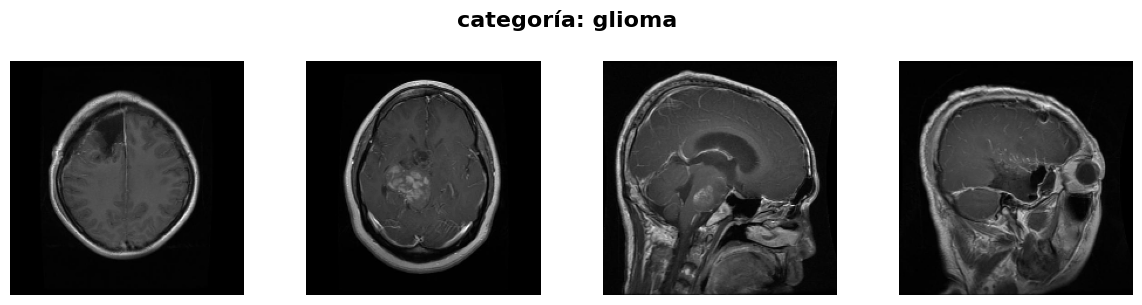

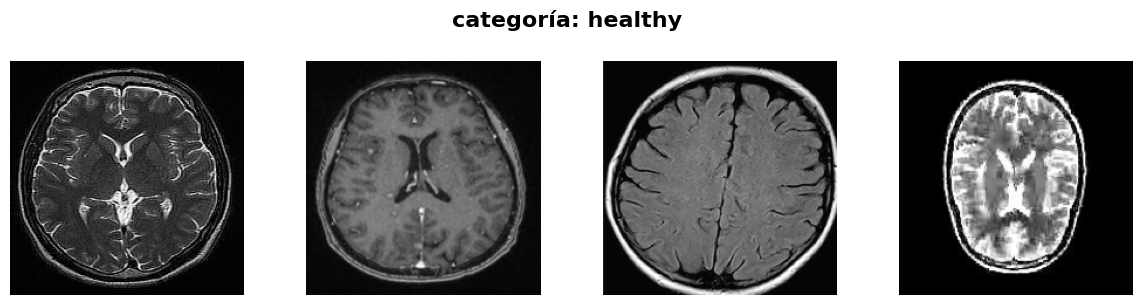

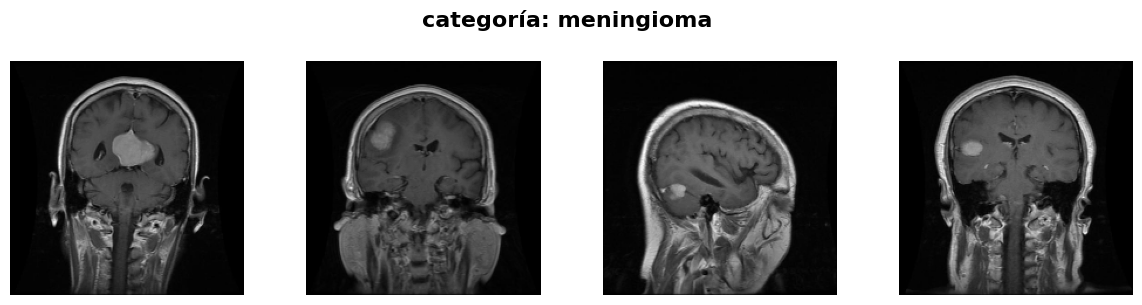

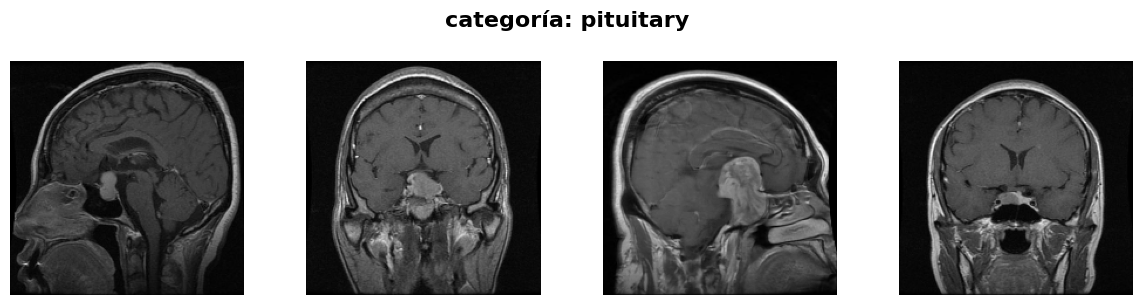

In [5]:
def graficar_imagenes(X, y, w=3):
    """
    Graficamos las imágenes por categorías
    """
    labels = np.unique(y)
    
    for label in labels:
        
        indices_label = np.where(y == label)[0]
        indices_seleccionados = np.random.choice(indices_label, w, replace=False)
        
        fig, axes = plt.subplots(1, w, figsize=(3 * w, 3))
        
        # Título principal 
        plt.suptitle(f'categoría: {label} ', fontsize=16, weight='bold', y=1)
        if w == 1:
            axes = [axes]
        
        for i, idx in enumerate(indices_seleccionados):
            imagen = X[idx]
            
            if imagen.max() <= 1.0:
                imagen_graficar = (imagen * 255).astype(np.uint8)
            else:
                imagen_graficar = imagen.astype(np.uint8)
            
            axes[i].imshow(imagen_graficar, cmap='gray')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
#Usamos la función
graficar_imagenes(X, y, w=4)

## Distribución de las imágenes

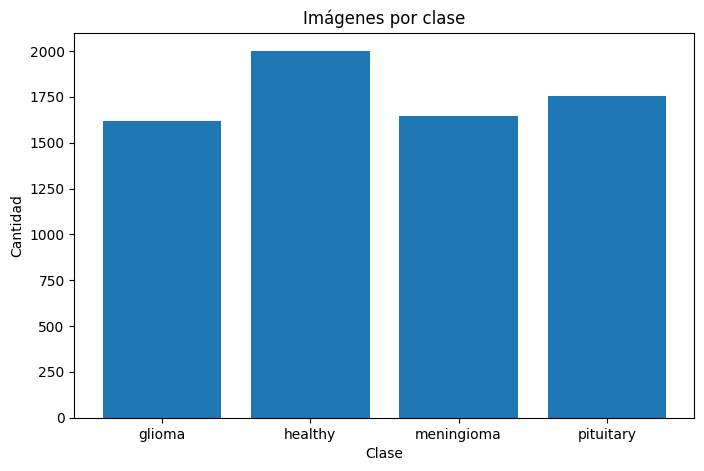

In [6]:
def graficar_distribucion(y):
    """
    Graficamos la cantidad de imágenes por categoría 
    """
    labels, counts = np.unique(y, return_counts=True)
    
    plt.figure(figsize=(8, 5))
    plt.bar(labels, counts)
    plt.title('Imágenes por clase')
    plt.xlabel('Clase')
    plt.ylabel('Cantidad')
    plt.show()

#Usamos la función
graficar_distribucion(y)

## Procesamiento de datos

In [7]:
# Verificar GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

def procesamiento_datos(X,y,batch_size,test_size=0.1, val_size=0.1, random_state=0):
    """
    Realiza el procesamiento de los datos  
    """
    # Codificar etiquetas
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    #Convertimos nuestros datos en tensores
    X=torch.tensor(X, dtype=torch.float32)
    y_encoded=torch.tensor(y_encoded, dtype=torch.long) #int64

    #Los datos estan en escala de gris es necesario agregar el canal de color 
    # Agrega un canal en la posición 1 (índice 0 es el lote, 1 es el canal)
    X = X.unsqueeze(1)

    #Primero separamos test
    X_temp, X_test, y_temp, y_test = train_test_split(X,
                                                       y_encoded,
                                                       test_size = test_size, 
                                                       random_state = random_state,
                                                       stratify=y_encoded  # Mantener distribución balanceada
                                                        )
    # Luego separamos entrenamiento y validación del resto
    val_relative_size = val_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=val_relative_size,
        random_state=random_state,
        stratify=y_temp  # Mantener distribución balanceada
    )
    
    # Crear datasets
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    # Crear dataloaders
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Mostrar estadísticas
    print("\nDistribución de datos:")
    print(f"Entrenamiento: {len(X_train)} imágenes ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Validación: {len(X_val)} imágenes ({len(X_val)/len(X)*100:.1f}%)")
    print(f"Test: {len(X_test)} imágenes ({len(X_test)/len(X)*100:.1f}%)")
    print(f"Total: {len(X)} imágenes")

    return train_dataloader, val_dataloader, test_dataloader

#Procesamos los datos 
train_dataloader, val_dataloader, test_dataloader = procesamiento_datos(X,y,
                                                                        batch_size=64,
                                                                        test_size=0.1,
                                                                        val_size=0.1,
                                                                        random_state=0)

Usando dispositivo: cuda

Distribución de datos:
Entrenamiento: 5617 imágenes (80.0%)
Validación: 703 imágenes (10.0%)
Test: 703 imágenes (10.0%)
Total: 7023 imágenes


## Modelos de clasificación

### Modelo de clasificación CNN

In [8]:
class ClassifierModelCNN(nn.Module):
    def __init__(self, num_classes=4):
        """
        Modelo de Red neuronal CNN  
        """
        #Inicializamos la clase
        super().__init__()
        
        # Capas convolucionales
        self.conv_layers = nn.Sequential(
            # Bloque 1
            nn.Conv2d(1, 32, kernel_size=3, padding=1),     # (canales_de_entrada, canales de salida, tamaño del kernel, paddig) 
            nn.BatchNorm2d(32),                             # Normalizacion Batch                  
            nn.ReLU(),                                      # Funcion de activación
            nn.Conv2d(32, 64, kernel_size=3, padding=1),    # (canales_de_entrada, canales de salida, tamaño del kernel, paddig) 
            nn.BatchNorm2d(64),                             # Normalizacion Batch 
            nn.ReLU(),                                      # Funcion de activación
            nn.MaxPool2d(2),                                # Aplicacion pooling maximo de 2D (2x2)  Reduce el tamaño espacial del mapa de características
            nn.Dropout(0.25),                               # Técnica de regularización que desactiva aleatoriamente (establece a cero) una fracción de las neuronas de la capa de entrada durante el entrenamiento.
                                                            #0.25: La probabilidad de que una neurona sea "descartada" es del 25%.
            
            # Bloque 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
            
            # Bloque 3
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((4, 4)),                    #Aplica un pooling promedio que se adapta al tamaño de la entrada para producir una salida de tamaño fijo.
                                                             #(4,4):Redimensiona el mapa de características a una salida de 4x4, independientemente de las dimensiones espaciales de la entrada.
            nn.Dropout(0.5)
        )
        
        # Capas fully connected
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 4 * 4, 512),        # (Numero de caracteristicas * Resolucion espacial, Numeros de neuronas)
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),                #(Entradas,salidas)
            nn.ReLU(),
            nn.Dropout(0.3),                    #Aplica dropout con una probabilidad del 30% en esta capa.
            nn.Linear(256, num_classes)         #(Entradas,salidas)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)     # Pasa el tensor de entrada x a través de todas las capas convolucionales definidas en self.conv_layers
        x = x.view(x.size(0), -1)   # Flatten -> El tensor (batch_size, 256, 4, 4) se convierte en (batch_size, 256 * 4 * 4).
        x = self.fc_layers(x)       # Pasa el tensor aplanado a través de las capas totalmente conectadas (self.fc_layers) para realizar la clasificación.
        return x

### Modelo preentrenado (Efficientnet B0)

In [9]:
def Pretrained_efficientnet_b0(num_classes):
    """
    Usar EfficientNet preentrenado
    """
    # Usar EfficientNet preentrenado
    model = models.efficientnet_b0(pretrained=True)
        
    # Adaptar para entrada en escala de grises
    # Reemplazar primera capa convolucional
    original_conv = model.features[0][0]
    model.features[0][0] = nn.Conv2d(
        1,  # 1 canal para escala de grises
        original_conv.out_channels,
        kernel_size=original_conv.kernel_size,
        stride=original_conv.stride,
        padding=original_conv.padding,
        bias=original_conv.bias is not None
    )
        
    # Copiar pesos (promedio de los 3 canales RGB)
    with torch.no_grad():
        model.features[0][0].weight.data = original_conv.weight.data.mean(dim=1, keepdim=True)
        
    # Reemplazar capa final
    in_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(in_features, 512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, num_classes)
    )
    return model
    

## Creación del modelo

In [10]:
def create_model(use_pretrained=True, num_classes=4):
    """
    Se crea el modelo
    """
    if use_pretrained:
        model= Pretrained_efficientnet_b0(num_classes)
    else:
        model = ClassifierModelCNN(num_classes)
    return model

In [11]:
# Crear modelos
torch.manual_seed(0)
torch.cuda.manual_seed(0)
#Modelo ClassifierModelCNN
model_ClassifierModelCNN = create_model(use_pretrained=False, num_classes=4)
model_ClassifierModelCNN = model_ClassifierModelCNN.to(device)

#Modelo EfficientNet preentrenado
model_pretrained = create_model(use_pretrained=True, num_classes=4)
model_pretrained = model_pretrained.to(device)

## Funcion de exactitud, de perdida y optimizador

In [12]:
def accuracy_fn(y_true, y_pred):
    """
    función de accuracy o exactitud.
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

def LossAndOptim(model):
    """
    función de perdida y optimizador.
    """
    #funciíon de perdida.
    loss_fn = nn.CrossEntropyLoss()
    #optimizador para el entrenamiento.
    optimizer = torch.optim.Adam(params = model.parameters(),
                              lr = 0.001, weight_decay=1e-4)
    return loss_fn, optimizer

## Entrenamiento

In [13]:
def TrainNetwork(model,epochs,loss_fn,optimizer,train_dataloader,val_dataloader,patience):
    #Fijamos una semilla aleatoria para que nuestros resultados sean reproducibles.
    torch.manual_seed(0)
    torch.cuda.manual_seed(0)
    #Guardamos diferentes valores para luego graficarlos.
    epoch_count = []
    loss_values = []
    val_loss_values = []
    train_acc_values = []
    val_acc_values = []
    
    # Variables para Early Stopping
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    #Iteramos en cada época.
    for epoch in range(epochs):
        #Le decimos al modelo que se ponga en 'modo de entrenamiento'.
        model.train()
        sum_loss=0
        sum_acc=0

        for X_train, y_train in train_dataloader:
            #Le decimos que haga los cálculos en la GPU.
            X_train = X_train.to(device)
            y_train = y_train.to(device)

            #2.Hacemos un paso forwarad.
            y_logits = model(X_train)
            # Para multi-clase: usar softmax + argmax 
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


            #3. Calculamos la pérdida y la exactitud de nuestro modelo para los datos para los que hicimos
            #el paso forward en el paso 2.
            loss = loss_fn(y_logits, y_train)
            acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

            #Esta función 'reinicia' los gradientes. Se utiliza cuando estamos entrenando por batches de datos y tenemos
            #memoria limitada. PyTorch per defecto acumula los gradientes de un batch y cuando pasamos de un batch a otro,
            #debemos reiniciar el gradiente.
            optimizer.zero_grad()

            #4. Utilizamos el algoritmo de retropropagación para estimar el gradiente de la pérdida.
            loss.backward()

            #5. Utilizamos el algoritmo de descenso del gradiente estocástico para actualizar los pesos de nuestra
            #red.
            optimizer.step()
            #Suma de la perdida total del lote
            sum_loss += loss.item() * X_train.size(0)
            #Suma exactitud
            sum_acc += acc * X_train.size(0)


        #Calcula la pérdida promedio de la época
        train_loss = sum_loss / len(train_dataloader.dataset)
        train_acc = sum_acc / len(train_dataloader.dataset)


        #Le decimos al modelo que se ponga en 'modo de evaluación'.
        model.eval()
        sum_loss_val=0
        sum_acc_val=0
        with torch.inference_mode():

            for X_val, y_val in val_dataloader:
                #Le decimos que haga los cálculos en la GPU.
                X_val = X_val.to(device)
                y_val = y_val.to(device)

                val_logits = model(X_val)
                val_pred = torch.softmax(val_logits, dim=1).argmax(dim=1)
                
                #Calculamos la pérdida y la exactitud en el conjunto de prueba
                val_loss = loss_fn(val_logits, y_val)
                val_acc = accuracy_fn(y_true = y_val,y_pred = val_pred)

                #Suma de la perdida total del lote
                sum_loss_val += val_loss.item() * X_val.size(0)
                #exactitud
                sum_acc_val += val_acc * X_val.size(0)
        
        
        
        #Calcula la pérdida promedio de la época  
        val_loss = sum_loss_val / len(val_dataloader.dataset)
        val_acc = sum_acc_val / len(val_dataloader.dataset)
            

        #Vamos a guardar los resultados para luego graficarlos.
        epoch_count.append(epoch)
        loss_values.append(train_loss)
        val_loss_values.append(val_loss)
        train_acc_values.append(train_acc)
        val_acc_values.append(val_acc)
            
        #Early stopping
        if val_loss < best_val_loss:
            # Mejoramos la pérdida de prueba
            best_val_loss = val_loss
            patience_counter = 0
            # Guardamos el mejor modelo
            best_model_state = model.state_dict().copy()
            print(f"Epoch {epoch}: Mejor pérdida de validación: {val_loss:.4f} (Guardando modelo)")
        else:
            # No mejoramos, incrementamos contador
            patience_counter += 1
            print(f"Epoch {epoch}: Pérdida de validación: {val_loss:.4f} (No mejora: {patience_counter}/{patience})")
        
        # Verificar si debemos parar
        if patience_counter >= patience:
            print(f"Early Stopping en epoch {epoch}. No hubo mejora en {patience} épocas.")
            print(f"Mejor pérdida de validación: {best_val_loss:.4f}")
            
            # Cargar el mejor modelo antes de retornar
            model.load_state_dict(best_model_state)
            break
        
        # Print de progreso cada época
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Si terminamos todas las épocas sin early stopping, cargar el mejor modelo
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        
    #Guardamos los resultados del entrenamiento para luego graficarlos.
    results = {"train_loss": loss_values,
              "train_acc": train_acc_values,
              "val_loss": val_loss_values,
              "val_acc": val_acc_values}
    return results

### Hiperparámetros

In [14]:
#Epocas y Paciencia (épocas sin mejora)
epochs = 15
patience=5           

### Entrenamiento del modelo creado

In [15]:
#Le decimos al modelo qué función de pérdida y optimizador usar.
loss_fn,optimizer = LossAndOptim(model_ClassifierModelCNN)
#Entrenamiento
Training_ClassifierModelCNN = TrainNetwork(model_ClassifierModelCNN,epochs,loss_fn,optimizer,train_dataloader,test_dataloader,patience)

Epoch 0: Mejor pérdida de validación: 0.7630 (Guardando modelo)
Epoch: 0 | Train Loss: 0.8360 | Train Acc: 64.75% | Val Loss: 0.7630 | Val Acc: 70.27%
Epoch 1: Mejor pérdida de validación: 0.6044 (Guardando modelo)
Epoch: 1 | Train Loss: 0.5873 | Train Acc: 76.86% | Val Loss: 0.6044 | Val Acc: 76.67%
Epoch 2: Mejor pérdida de validación: 0.5858 (Guardando modelo)
Epoch: 2 | Train Loss: 0.5120 | Train Acc: 79.95% | Val Loss: 0.5858 | Val Acc: 75.25%
Epoch 3: Pérdida de validación: 1.3636 (No mejora: 1/5)
Epoch: 3 | Train Loss: 0.4678 | Train Acc: 82.23% | Val Loss: 1.3636 | Val Acc: 62.45%
Epoch 4: Mejor pérdida de validación: 0.5167 (Guardando modelo)
Epoch: 4 | Train Loss: 0.4051 | Train Acc: 84.44% | Val Loss: 0.5167 | Val Acc: 79.23%
Epoch 5: Mejor pérdida de validación: 0.2702 (Guardando modelo)
Epoch: 5 | Train Loss: 0.3932 | Train Acc: 84.81% | Val Loss: 0.2702 | Val Acc: 89.33%
Epoch 6: Pérdida de validación: 0.4722 (No mejora: 1/5)
Epoch: 6 | Train Loss: 0.3390 | Train Acc: 86.

### Entrenamiento del modelo preentrenado

In [16]:
#Le decimos al modelo qué función de pérdida y optimizador usar.
loss_fn,optimizer = LossAndOptim(model_pretrained)
#Entrenamiento
Training_model_pretrained = TrainNetwork(model_pretrained,epochs,loss_fn,optimizer,train_dataloader,test_dataloader,patience)

Epoch 0: Mejor pérdida de validación: 0.1137 (Guardando modelo)
Epoch: 0 | Train Loss: 0.2861 | Train Acc: 89.99% | Val Loss: 0.1137 | Val Acc: 96.02%
Epoch 1: Mejor pérdida de validación: 0.0487 (Guardando modelo)
Epoch: 1 | Train Loss: 0.0921 | Train Acc: 96.96% | Val Loss: 0.0487 | Val Acc: 98.01%
Epoch 2: Pérdida de validación: 0.0797 (No mejora: 1/5)
Epoch: 2 | Train Loss: 0.0537 | Train Acc: 98.13% | Val Loss: 0.0797 | Val Acc: 97.30%
Epoch 3: Pérdida de validación: 0.0876 (No mejora: 2/5)
Epoch: 3 | Train Loss: 0.0432 | Train Acc: 98.52% | Val Loss: 0.0876 | Val Acc: 97.30%
Epoch 4: Pérdida de validación: 0.0701 (No mejora: 3/5)
Epoch: 4 | Train Loss: 0.0487 | Train Acc: 98.70% | Val Loss: 0.0701 | Val Acc: 97.01%
Epoch 5: Mejor pérdida de validación: 0.0430 (Guardando modelo)
Epoch: 5 | Train Loss: 0.0333 | Train Acc: 98.91% | Val Loss: 0.0430 | Val Acc: 98.72%
Epoch 6: Pérdida de validación: 0.0682 (No mejora: 1/5)
Epoch: 6 | Train Loss: 0.0204 | Train Acc: 99.36% | Val Loss: 

## Gráficas

In [33]:
# Función para trazar curvas de pérdida de un modelo
def plot_loss_curves(results):
    """Trazar las curvas de entrenamiento de un diccionario de resultados.
    Args:
        results (dict): diccionario que contiene listas de valores, p. ej.
            {"train_loss": [...],
             "train_acc": [...],
             "val_loss": [...],
             "val_acc": [...]}
    """

    loss = np.array(torch.tensor(results["train_loss"]).cpu().numpy())
    test_loss = np.array(torch.tensor(results["val_loss"]).cpu().numpy())
    accuracy = np.array(torch.tensor(results["train_acc"]).cpu().numpy())
    test_accuracy = np.array(torch.tensor(results["val_acc"]).cpu().numpy())

    epochs = range(1,len(np.array(torch.tensor(results["train_loss"]).cpu().numpy()))+1,1)

    plt.figure(figsize = (15, 7))

    # Trazar la pérdida
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "Pérdida de entrenamiento")
    plt.plot(epochs, test_loss, label = "Pérdida de validación")
    plt.title("Pérdida")
    plt.xlabel("Épocas")
    plt.legend()

    # Trazar la exactitud
    plt.subplot(1, 2, 2)
    # Umbral 90% de precisión 
    plt.plot(epochs, 90*np.ones(len(epochs)), 'red', lw = 2, label = 'Umbral')
    plt.plot(epochs, accuracy, label = "Exactitud de entrenamiento")
    plt.plot(epochs, test_accuracy, label = "Exactitud de validación")
    plt.title("Exactitud")
    plt.xlabel("Época")
    plt.legend()
    plt.show()

### Gráficas modelo creado

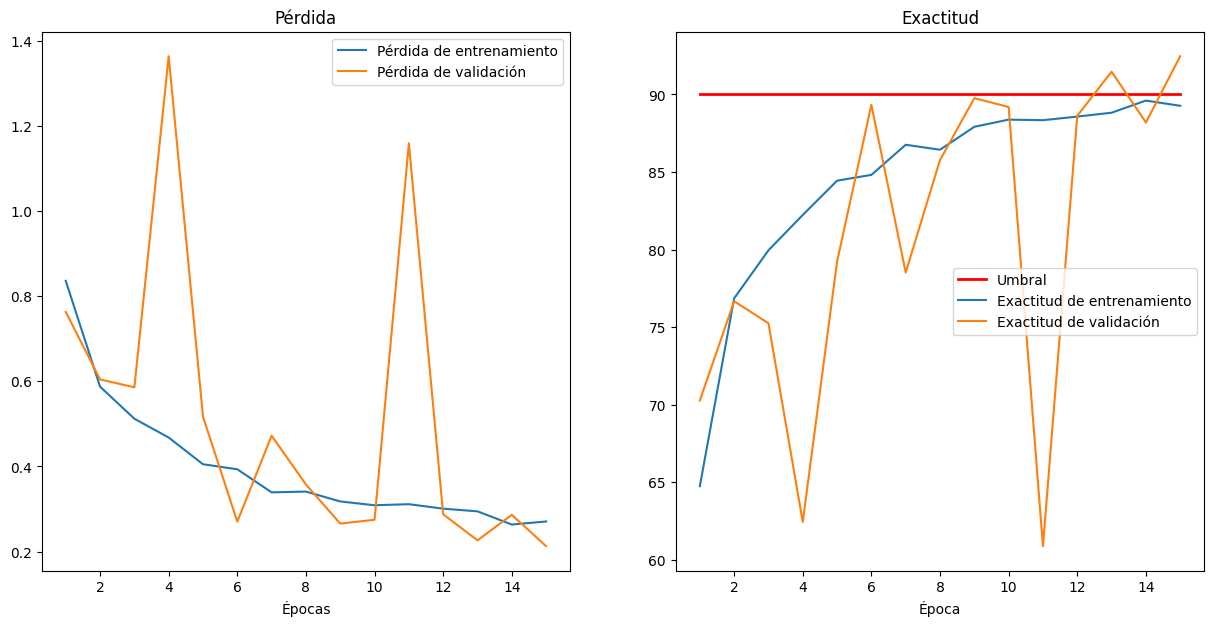

In [34]:
plot_loss_curves(Training_ClassifierModelCNN)

### Gráficas modelo preentrenado

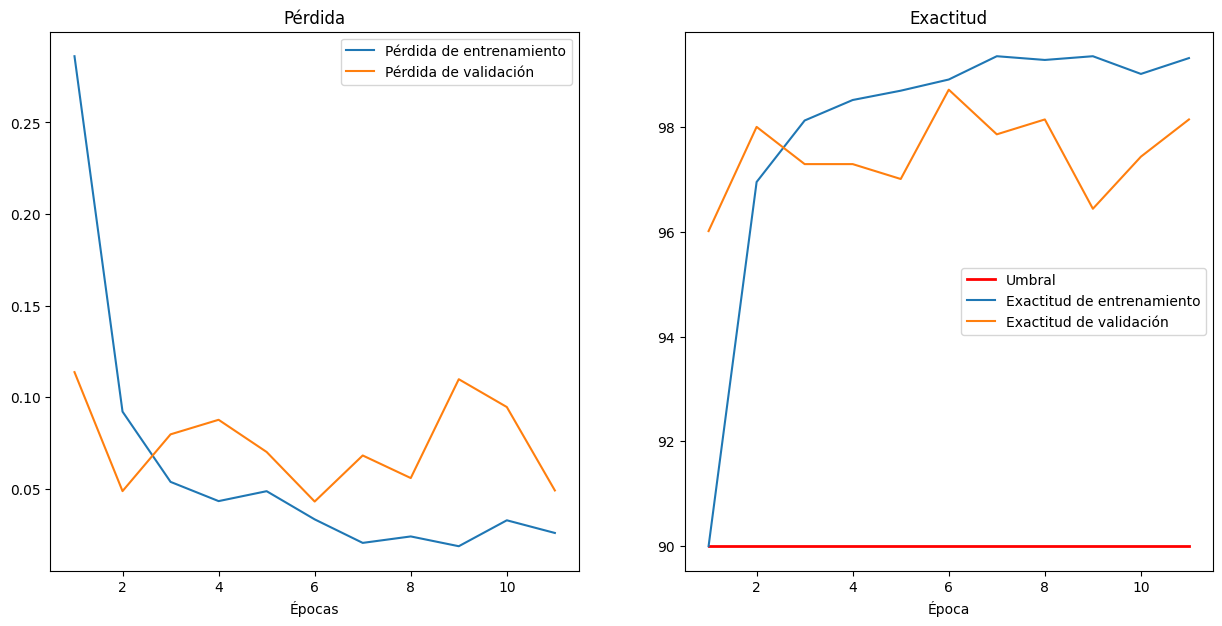

In [35]:
plot_loss_curves(Training_model_pretrained)

### Tabla comparativa

In [40]:
def tabla_comparativa(modelo1_res, modelo2_res, nombre1="Modelo 1", nombre2="Modelo 2"):
    # Encontrar la época con mejor pérdida de validación
    best_epoch_model1 = np.argmin(modelo1_res['val_loss'])
    best_epoch_model2 = np.argmin(modelo2_res['val_loss'])
    
    # Calcular diferencia entre train y val (sobreajuste)
    overfitting_model1 = modelo1_res['train_acc'][best_epoch_model1] - modelo1_res['val_acc'][best_epoch_model1]
    overfitting_model2 = modelo2_res['train_acc'][best_epoch_model2] - modelo2_res['val_acc'][best_epoch_model2]
    
    datos = {
        'Métrica': ['Época Mejor Modelo',
                   'Train Loss',
                   'Val Loss', 
                   'Train Acc',
                   'Val Acc ',
                   'Diferencia Train-Val Acc',
                   'Épocas Totales Entrenadas'],
        nombre1: [
            best_epoch_model1,
            f"{modelo1_res['train_loss'][best_epoch_model1]:.4f}",
            f"{modelo1_res['val_loss'][best_epoch_model1]:.4f}", 
            f"{modelo1_res['train_acc'][best_epoch_model1]:.2f}",
            f"{modelo1_res['val_acc'][best_epoch_model1]:.2f}",
            f"{overfitting_model1:.2f}",
            len(modelo1_res['train_loss'])
        ],
        nombre2: [
            best_epoch_model2,
            f"{modelo2_res['train_loss'][best_epoch_model2]:.4f}",
            f"{modelo2_res['val_loss'][best_epoch_model2]:.4f}",
            f"{modelo2_res['train_acc'][best_epoch_model2]:.2f}",
            f"{modelo2_res['val_acc'][best_epoch_model2]:.2f}",
            f"{overfitting_model2:.2f}",
            len(modelo2_res['train_loss'])
        ]
    }
    
    df = pd.DataFrame(datos)
    return df
tabla_comparativa = tabla_comparativa(Training_ClassifierModelCNN, Training_model_pretrained,
                                                nombre1="Training_ClassifierModelCNN", nombre2="Training_model_pretrained")
tabla_comparativa

,Métrica,Training_ClassifierModelCNN,Training_model_pretrained
0,Época Mejor Modelo,14,5
1,Train Loss,0.2706,0.0333
2,Val Loss,0.2125,0.0430
3,Train Acc,89.26,98.91
4,Val Acc,92.46,98.72
5,Diferencia Train-Val Acc,-3.20,0.19
6,Épocas Totales Entrenadas,15,11


## Evaluación de los modelos 

In [36]:
def evaluate_model(model, data_loader, dataset_name):
    """Evalua los modelos entrenados.
    """
    #modo de evaluación
    model.eval()
    #variables iniciales
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []
    
    # Obtener los nombres de las clases
    class_names = ['glioma', 'meningioma', 'pituitary', 'notumor']
    
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    
    print(f"\n{dataset_name} Accuracy: {accuracy:.2f}%")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, 
                              target_names=class_names))
    
    # Matriz de confusión
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Matriz de Confusión - {dataset_name}')
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Predicción')
    plt.show()
    
    return accuracy

### Evaluación del modelo creado


EVALUACIÓN EN TRAIN SET

Train Accuracy: 92.11%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.87      0.92      1297
  meningioma       0.97      0.95      0.96      1600
   pituitary       0.82      0.87      0.84      1315
     notumor       0.92      0.98      0.95      1405

    accuracy                           0.92      5617
   macro avg       0.92      0.92      0.92      5617
weighted avg       0.92      0.92      0.92      5617



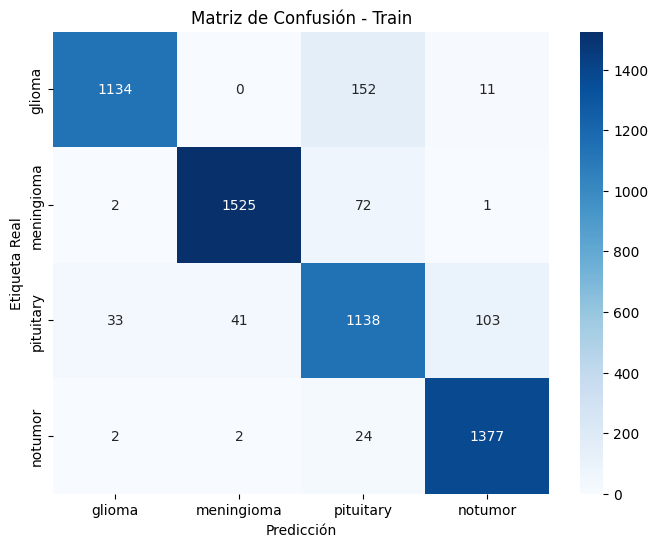


EVALUACIÓN EN VALIDATION SET

Validation Accuracy: 89.62%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.81      0.87       162
  meningioma       0.95      0.94      0.95       200
   pituitary       0.76      0.84      0.80       165
     notumor       0.93      0.97      0.95       176

    accuracy                           0.90       703
   macro avg       0.90      0.89      0.89       703
weighted avg       0.90      0.90      0.90       703



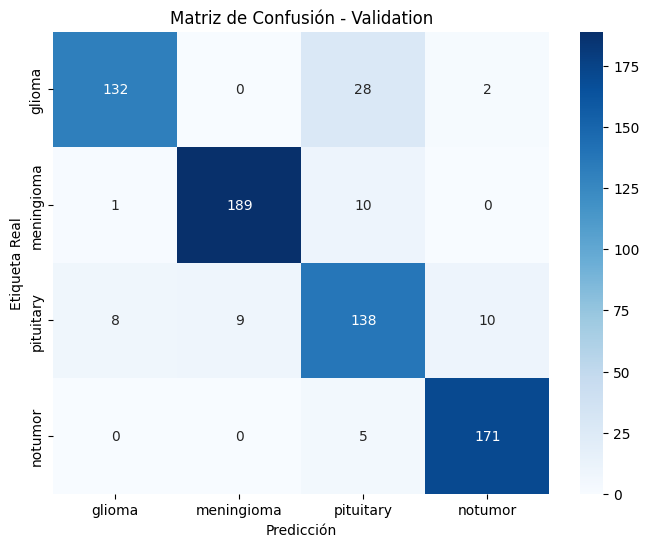


EVALUACIÓN EN TEST SET

Test Accuracy: 92.46%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.86      0.92       162
  meningioma       0.97      0.94      0.96       200
   pituitary       0.81      0.90      0.85       165
     notumor       0.96      0.98      0.97       176

    accuracy                           0.92       703
   macro avg       0.93      0.92      0.92       703
weighted avg       0.93      0.92      0.93       703



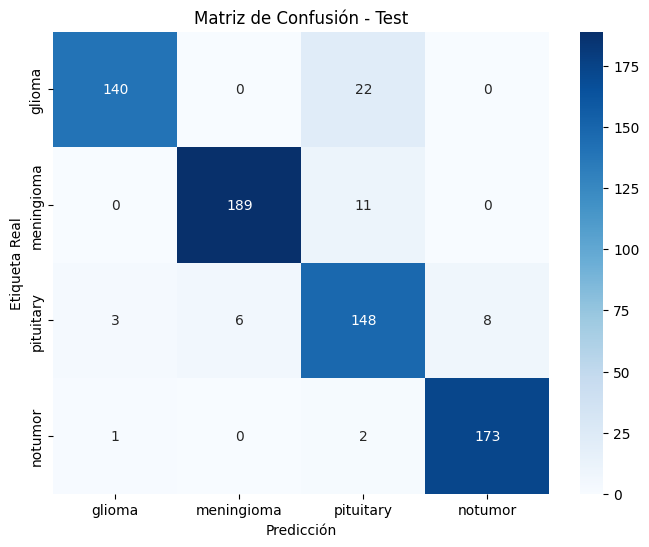

92.46088193456615

In [22]:
print("\n" + "="*50)
print("EVALUACIÓN EN TRAIN SET")
evaluate_model(model_ClassifierModelCNN, train_dataloader, "Train")

print("\n" + "="*50)
print("EVALUACIÓN EN VALIDATION SET")
evaluate_model(model_ClassifierModelCNN, val_dataloader, "Validation")

print("\n" + "="*50)
print("EVALUACIÓN EN TEST SET")
evaluate_model(model_ClassifierModelCNN, test_dataloader, "Test")

### Evaluación del modelo preentrenado


EVALUACIÓN EN TRAIN SET

Train Accuracy: 99.47%
Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00      1297
  meningioma       1.00      1.00      1.00      1600
   pituitary       0.98      1.00      0.99      1315
     notumor       1.00      0.98      0.99      1405

    accuracy                           0.99      5617
   macro avg       0.99      0.99      0.99      5617
weighted avg       0.99      0.99      0.99      5617



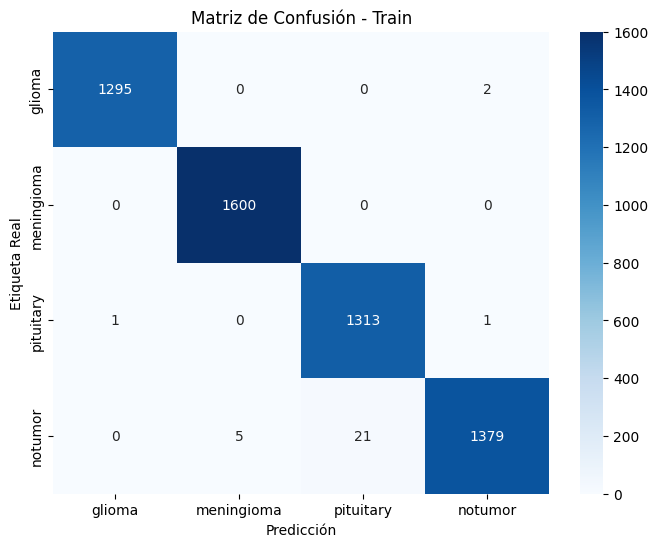


EVALUACIÓN EN VALIDATION SET

Validation Accuracy: 97.44%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       162
  meningioma       0.99      1.00      0.99       200
   pituitary       0.94      0.98      0.96       165
     notumor       0.99      0.94      0.97       176

    accuracy                           0.97       703
   macro avg       0.97      0.97      0.97       703
weighted avg       0.97      0.97      0.97       703



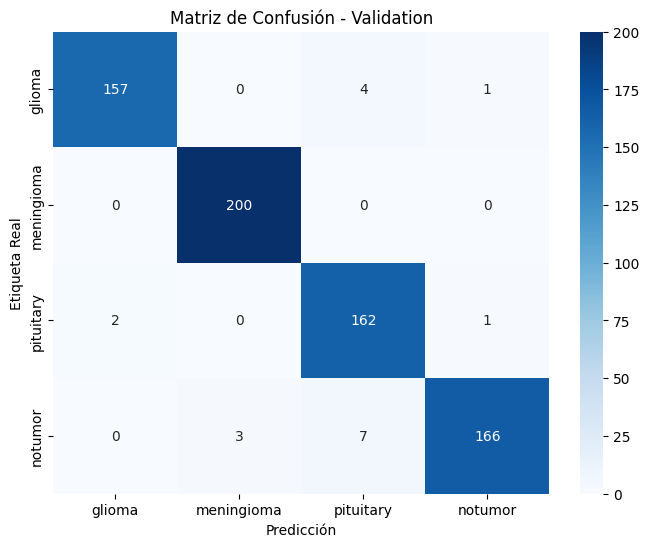


EVALUACIÓN EN TEST SET

Test Accuracy: 98.15%
Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       162
  meningioma       1.00      1.00      1.00       200
   pituitary       0.94      0.99      0.96       165
     notumor       0.99      0.97      0.98       176

    accuracy                           0.98       703
   macro avg       0.98      0.98      0.98       703
weighted avg       0.98      0.98      0.98       703



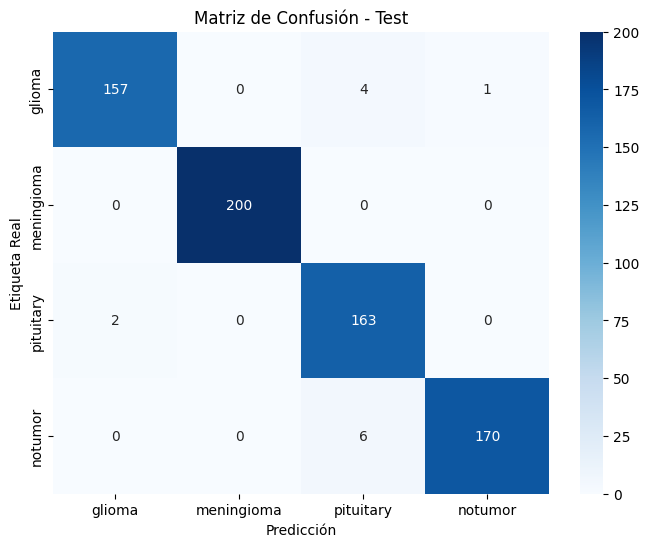

98.15078236130867

In [23]:
print("\n" + "="*50)
print("EVALUACIÓN EN TRAIN SET")
evaluate_model(model_pretrained, train_dataloader, "Train")

print("\n" + "="*50)
print("EVALUACIÓN EN VALIDATION SET")
evaluate_model(model_pretrained, val_dataloader, "Validation")

print("\n" + "="*50)
print("EVALUACIÓN EN TEST SET")
evaluate_model(model_pretrained, test_dataloader, "Test")